C:\Users\sudik\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 37ms/step - accuracy: 0.3132 - loss: 1.8664 - val_accuracy: 0.4601 - val_loss: 1.4841
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.4787 - loss: 1.4380 - val_accuracy: 0.5055 - val_loss: 1.3867
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.5332 - loss: 1.3081 - val_accuracy: 0.5500 - val_loss: 1.2664


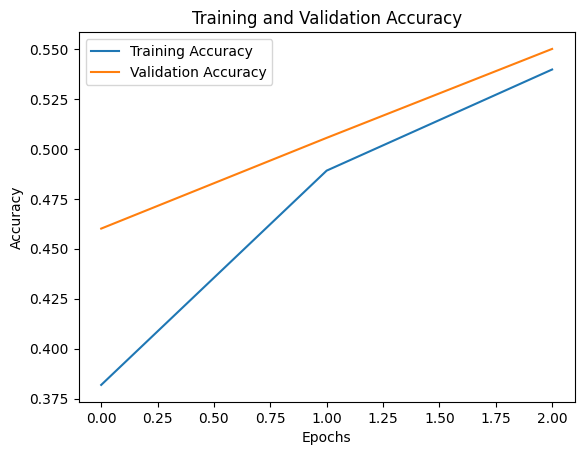

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5510 - loss: 1.2542
Test Accuracy: 54.40%


In [1]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the LeNet model
def lenet():
    model = models.Sequential()
    # Layer 1: Convolution + Pooling
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3), padding='same'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))

    # Layer 2: Convolution + Pooling
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))

    # Flatten and Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # Output layer

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the model
model = lenet()

# Train the model
history = model.fit(x_train, y_train, epochs=3, validation_split=0.2, batch_size=64, verbose=1)

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")
